# Data Scopes at a scale: Analyzing EMLO


For the Data Scopes at a scale article we wanted a dataset to analyze on different scales. A collection of letters seemed a good choice as 

- letters are objects more or less familiar to most humanities scholars 
- letters can be studied at many different scales: a single letter is as much a viable object of study as a large collection of letters and anything in between
    
We opted for the Early Modern Letters Online (http://emlo.bodleian.ox.ac.uk) collection compiled by the Oxford Bodleian Library in cooperation with a host of other institutes. At the time of writing (March 2020) it contains 51 collections covering both the diplomatic and the scientific and cultural world and spans more than three centuries, with the first letter from 1506 and the last from 1837. 

The collection is not available for download, so we had to do some web scraping to get the information ready for analysis.

In [1]:
import pandas as pd


## Collection overview

EMLO has an overview page of its collections, with the number of letters. 

the site is dynamic, so we cannot read it directly using pandas, but use request to store it on our desktop. 

In [35]:
import requests

In [37]:
r = requests.get('http://emlo.bodleian.ox.ac.uk/vis/chronology')

In [41]:
with open("/Users/rikhoekstra/Desktop/Early Modern Letters Online   Chronology.html") as flin:
    df = pd.read_html(flin.read())

# throw out the 'all_catalogs' row with df.drop(0)

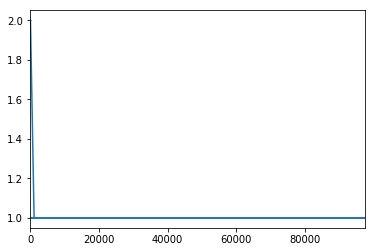

In [51]:
df["Letters with years▼▲"].value_counts().plot.line()

In [55]:
df["Letters with years▼▲"].value_counts()

121      2
80       2
1136     1
282      1
41690    1
2457     1
939      1
85       1
8020     1
335      1
274      1
72       1
450      1
99       1
97504    1
651      1
143      1
8        1
4244     1
2000     1
48       1
3        1
2114     1
106      1
28       1
712      1
1584     1
170      1
253      1
380      1
1659     1
504      1
2524     1
309      1
1352     1
49       1
3696     1
172      1
290      1
1899     1
1160     1
553      1
1835     1
505      1
3046     1
299      1
932      1
931      1
7104     1
Name: Letters with years▼▲, dtype: int64

In [10]:
import string
dfs = {}
for letter in string.ascii_lowercase:
    dfs[letter] = pd.read_html("http://emlo.bodleian.ox.ac.uk/browse/people?letter=%s" % letter)

In [21]:
dfss = { }
for l in dfs.keys():
    try:
        dfss[l] = dfs[l][0]
    except TypeError:
        print (dfs[l][0])

In [23]:
aldf = pd.concat(dfss)

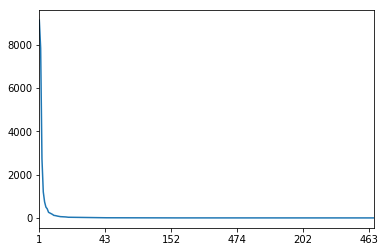

In [30]:
x = aldf['Letters Written']
x.value_counts().plot.line()

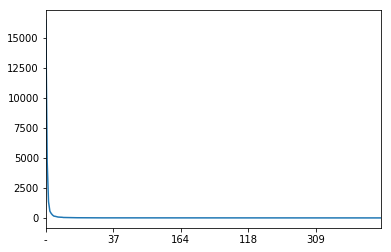

In [31]:
y = aldf['Letters Received']
y.value_counts().plot.line()

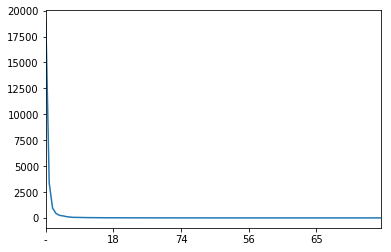

In [32]:
z = aldf["Letters Mentioning"]
z.value_counts().plot.line()

Analysis



In [56]:
len(df)

51